In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
#import tikzplotlib as tpl
%matplotlib inline

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [28]:
from tueplots import bundles
plt.rcParams.update(bundles.neurips2021())
figheight = bundles.neurips2021()["figure.figsize"][1]
figwidth = bundles.neurips2021()["figure.figsize"][0]
print(figheight, figwidth)

1.699593426303529 5.499999861629998


## Load and visualize data

In [7]:
poisson_df = pd.read_csv('data/poisson_sim.csv')
poisson_df

,id,num_awards,prog,math
0,45,0,3,41
1,108,0,1,41
2,15,0,3,44
3,67,0,3,42
4,153,0,3,40
5,51,0,1,42
6,164,0,3,46
7,133,0,3,40
8,2,0,3,33
9,53,0,3,46


In [8]:
poisson_df.drop(columns = ['id'], inplace=True)

poisson_general_df = poisson_df[poisson_df['prog'] == 1]
poisson_academic_df = poisson_df[poisson_df['prog'] == 2]
poisson_vocational_df = poisson_df[poisson_df['prog'] == 3]

<ipython-input-31-ad6e98bacf85>:15: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


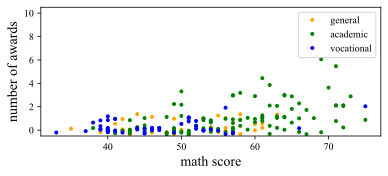

In [31]:
s = 0.2
eps1 = np.random.normal(0, 0.2, size=len(poisson_general_df))
eps2 = np.random.normal(0, 0.2, size=len(poisson_academic_df))
eps3 = np.random.normal(0, 0.2, size=len(poisson_vocational_df))

fig = plt.figure(figsize=(figwidth, 1.5*figheight), dpi=200)
plt.ylim(-0.5, 10.5)
plt.ylabel('number of awards', size=14)
plt.xlabel('math score', size=14)
plt.plot(poisson_general_df['math'], poisson_general_df['num_awards']+eps1, '.', label="general", color='orange')
plt.plot(poisson_academic_df['math'], poisson_academic_df['num_awards']+eps2, '.', label="academic", color='green')
plt.plot(poisson_vocational_df['math'], poisson_vocational_df['num_awards']+eps3, '.', label="vocational", color='blue')
plt.legend()

plt.tight_layout()

"""
tpl.save(
    "Poisson_all_points.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=True,
    float_format=".3g",
    strict=True
)
#"""
plt.savefig('Poisson_all_points.pdf')

plt.show();

In [10]:
from scipy.special import gamma as gamma_func

def gamma_pdf(x, a, b):
    r = b**a/gamma_func(a) * (x ** (a-1)) * (np.exp(-x*b))
    return(r)

In [11]:
poisson_general_df[poisson_general_df['math'] == 57]

,num_awards,prog,math
40,0,1,57
87,0,1,57
99,0,1,57
160,0,1,57


In [12]:
poisson_academic_df[poisson_academic_df['math'] == 57]

,num_awards,prog,math
96,1,2,57
113,0,2,57
133,0,2,57
137,1,2,57
140,0,2,57
149,3,2,57
171,3,2,57


In [13]:
poisson_vocational_df[poisson_vocational_df['math'] == 57]

,num_awards,prog,math
103,0,3,57
115,0,3,57


## Looking at one of the marginal Gamma distributions

<ipython-input-10-2a58befc71af>:4: RuntimeWarning: divide by zero encountered in power
  r = b**a/gamma_func(a) * (x ** (a-1)) * (np.exp(-x*b))


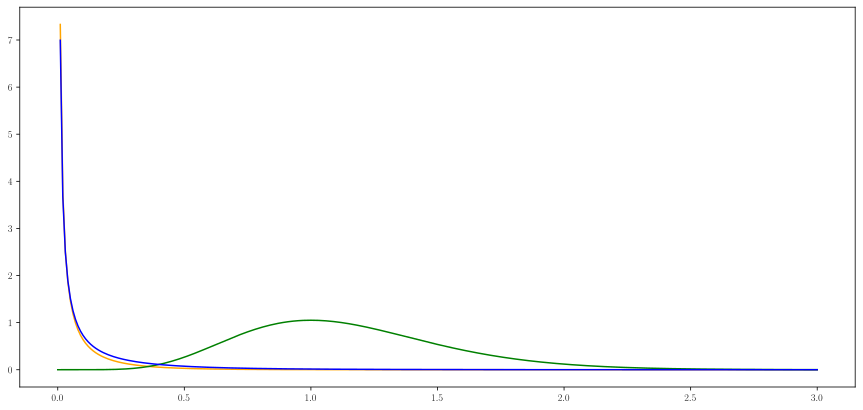

In [14]:
x = np.linspace(0, 3, 300+1)
alpha_0 = 0.1
beta_0 = 0.1

gamma_test = gamma_pdf(x, alpha_0+1, beta_0+1)

gamma_general = gamma_pdf(x, alpha_0+0, beta_0+4)
gamma_academic = gamma_pdf(x, alpha_0+8, beta_0+7)
gamma_vocational = gamma_pdf(x, alpha_0+0, beta_0+2)

plt.figure(figsize=(15,7))

plt.plot(x, gamma_general, color='orange')
plt.plot(x, gamma_academic, color='green')
plt.plot(x, gamma_vocational, color='blue')
plt.show();

In [15]:
def get_counts_and_num_awards(df):
    
    df_new = df.groupby(['math']).size().reset_index(name='counts')
    df_new['sum_awards'] = df.groupby(['math']).sum().reset_index()['num_awards']
    
    return(df_new)

In [16]:
poisson_general_combined_df = get_counts_and_num_awards(poisson_general_df)
poisson_academic_combined_df = get_counts_and_num_awards(poisson_academic_df)
poisson_vocational_combined_df = get_counts_and_num_awards(poisson_vocational_df)

In [17]:
def add_alpha_beta(df, alpha_0=0.1, beta_0=0.1):
    
    df['alpha'] = df['sum_awards'] + alpha_0
    df['beta'] = df['counts'] + beta_0
    return(df)

In [18]:
poisson_general_combined_df = add_alpha_beta(poisson_general_combined_df)
poisson_academic_combined_df = add_alpha_beta(poisson_academic_combined_df)
poisson_vocational_combined_df = add_alpha_beta(poisson_vocational_combined_df)

In [19]:
def add_mu_sigma(df):
    
    df['mu'] = np.log(df['alpha'] / df['beta'])
    df['sigma2'] = 1 / df['alpha']
    return(df)

In [20]:
poisson_general_combined_df = add_mu_sigma(poisson_general_combined_df)
poisson_academic_combined_df = add_mu_sigma(poisson_academic_combined_df)
poisson_vocational_combined_df = add_mu_sigma(poisson_vocational_combined_df)

# Use GP+LM
using prepackages GPs from SciKit learn

In [21]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, RationalQuadratic

### For the general group

In [22]:
poisson_general_scatter_df = poisson_general_df.groupby(['math', 'num_awards']).size().reset_index(name="count")
poisson_general_scatter_df.head(5)

,math,num_awards,count
0,35,0,1
1,39,0,2
2,41,0,2
3,42,0,4
4,42,1,1


<ipython-input-32-0c21f1637ed8>:30: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


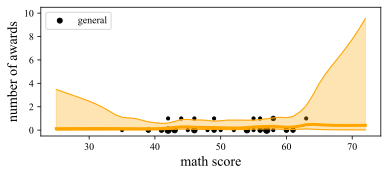

In [32]:
X_general = poisson_general_combined_df['math']
Y_general = poisson_general_combined_df['mu']

x_general = np.array(range(X_general.min() - 10, X_general.max() + 10))

kernel = RationalQuadratic(length_scale=2, alpha=1) + DotProduct(sigma_0=4)
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0, n_restarts_optimizer=10, optimizer=None,
        alpha=np.sqrt(poisson_general_combined_df['sigma2'].values)
                              ).fit(X_general.values.reshape(-1,1), Y_general)

general_mean, general_std = gpr.predict(x_general.reshape(-1,1), return_std=True)

ub_general = np.exp(general_mean + 2*general_std)
lb_general = np.exp(general_mean - 2*general_std)

fig = plt.figure(figsize=(figwidth, 1.5*figheight), dpi=200)

plt.ylim(-0.5, 10.5)
plt.ylabel('number of awards', size=14)
plt.xlabel('math score', size=14)
plt.scatter(poisson_general_scatter_df['math'], poisson_general_scatter_df['num_awards'],
            s=10* poisson_general_scatter_df['count'], color='black', label='general')
plt.plot(x_general, np.exp(general_mean), lw=3, color='orange')
plt.plot(x_general, ub_general, lw=1, color='orange')
plt.plot(x_general, lb_general, lw=1, color='orange')
plt.fill_between(x_general, lb_general, ub_general, alpha=0.3, color='orange')
plt.legend()

plt.tight_layout()

"""
tpl.save(
    "general_GP.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=True,
    float_format=".3g",
    strict=True
)
#"""

plt.savefig('general_GP.pdf')

plt.plot();

In [36]:
print(X_general.values)
print(Y_general.values)
print(np.sqrt(poisson_general_combined_df['sigma2'].values))

[35 39 41 42 43 44 45 46 48 49 50 52 54 55 56 57 58 60 61 63]
[-2.39789527 -3.04452244 -3.04452244 -1.53393036 -3.4339872   0.
 -2.39789527 -1.31567679 -2.39789527 -1.03609193 -2.39789527 -2.39789527
 -3.4339872  -0.64662716 -1.03609193 -3.71357207 -0.38946477 -3.04452244
 -3.04452244  0.        ]
[3.16227766 3.16227766 3.16227766 0.95346259 3.16227766 0.95346259
 3.16227766 0.95346259 3.16227766 0.95346259 3.16227766 3.16227766
 3.16227766 0.95346259 0.95346259 3.16227766 0.69006556 3.16227766
 3.16227766 0.95346259]


### For academic

In [24]:
poisson_academic_scatter_df = poisson_academic_df.groupby(['math', 'num_awards']).size().reset_index(name="count")
poisson_academic_scatter_df.head(5)

,math,num_awards,count
0,38,0,1
1,41,0,1
2,41,1,1
3,42,0,1
4,43,0,3


<ipython-input-33-19b3b3959cb9>:30: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


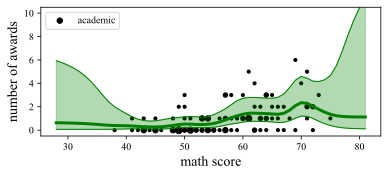

In [33]:
X_academic = poisson_academic_combined_df['math']
Y_academic = poisson_academic_combined_df['mu']

x_academic = np.array(range(X_academic.min() - 10, X_academic.max() + 7))

kernel = RationalQuadratic(length_scale=3, alpha=1) + DotProduct(sigma_0=1)
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0, n_restarts_optimizer=10, optimizer=None,
        alpha=np.sqrt(poisson_academic_combined_df['sigma2'].values)
                              ).fit(X_academic.values.reshape(-1,1), Y_academic)

academic_mean, academic_std = gpr.predict(x_academic.reshape(-1,1), return_std=True)

ub_academic = np.exp(academic_mean + 2*academic_std)
lb_academic = np.exp(academic_mean - 2*academic_std)

fig = plt.figure(figsize=(figwidth, 1.5*figheight), dpi=200)

plt.ylim(-0.5, 10.5)
plt.ylabel('number of awards', size=14)
plt.xlabel('math score', size=14)
plt.scatter(poisson_academic_scatter_df['math'], poisson_academic_scatter_df['num_awards'],
            s=10* poisson_academic_scatter_df['count'], color='black', label='academic')
plt.plot(x_academic, np.exp(academic_mean), lw=3, color='green')
plt.plot(x_academic, ub_academic, lw=1, color='green')
plt.plot(x_academic, lb_academic, lw=1, color='green')
plt.fill_between(x_academic, lb_academic, ub_academic, alpha=0.3, color='green')
plt.legend()

plt.tight_layout()

"""
tpl.save(
    "academic_GP.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=True,
    float_format=".3g",
    strict=True
)
#"""

plt.savefig('academic_GP.pdf')

plt.plot();

## Redo the same for vocational

In [26]:
poisson_vocational_scatter_df = poisson_vocational_df.groupby(['math', 'num_awards']).size().reset_index(name="count")
poisson_vocational_scatter_df.head(5)

,math,num_awards,count
0,33,0,1
1,37,0,1
2,38,0,1
3,39,0,3
4,39,1,1


<ipython-input-34-cd6f9fe75da2>:30: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


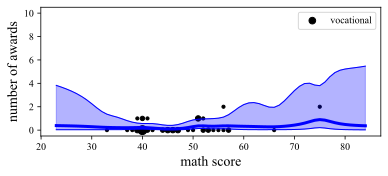

In [34]:
X_vocational = poisson_vocational_combined_df['math']
Y_vocational = poisson_vocational_combined_df['mu']

x_vocational = np.array(range(X_vocational.min() - 10, X_vocational.max() + 10))

kernel = RationalQuadratic(length_scale=3, alpha=1) + DotProduct(sigma_0=1)
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0, n_restarts_optimizer=10, optimizer=None,
        alpha=np.sqrt(poisson_vocational_combined_df['sigma2'].values)
                              ).fit(X_vocational.values.reshape(-1,1), Y_vocational)

vocational_mean, vocational_std = gpr.predict(x_vocational.reshape(-1,1), return_std=True)

ub_vocational = np.exp(vocational_mean + 2*vocational_std)
lb_vocational = np.exp(vocational_mean - 2*vocational_std)

fig = plt.figure(figsize=(figwidth, 1.5*figheight), dpi=200)

plt.ylim(-0.5, 10.5)
plt.ylabel('number of awards', size=14)
plt.xlabel('math score', size=14)
plt.scatter(poisson_vocational_scatter_df['math'], poisson_vocational_scatter_df['num_awards'],
            s=10* poisson_vocational_scatter_df['count'], color='black', label='vocational')
plt.plot(x_vocational, np.exp(vocational_mean), lw=3, color='blue')
plt.plot(x_vocational, ub_vocational, lw=1, color='blue')
plt.plot(x_vocational, lb_vocational, lw=1, color='blue')
plt.fill_between(x_vocational, lb_vocational, ub_vocational, alpha=0.3, color='blue')
plt.legend()

plt.tight_layout()

"""
tpl.save(
    "vocational_GP.tex",
    figure = fig,
    axis_width = "\\figwidth",
    axis_height= "\\figheight",
    tex_relative_path_to_data=".",
    override_externals=True,
    float_format=".3g",
    strict=True
)
#"""

plt.savefig('vocational_GP.pdf')

plt.plot();